In [1]:
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import time
import warnings
warnings.filterwarnings('ignore')

In [2]:
df_train = pd.read_csv('C:\\Users\\kishl\Downloads\\rossmann-store-sales\\train.csv', 
                       parse_dates=['Date'],
                       date_parser=(lambda dt: pd.to_datetime(dt, format='%Y-%m-%d')))

df_test = pd.read_csv('C:\\Users\\kishl\Downloads\\rossmann-store-sales\\test.csv', 
                        parse_dates=['Date'],
                        date_parser=(lambda dt: pd.to_datetime(dt, format='%Y-%m-%d')))

df_store = pd.read_csv('C:\\Users\\kishl\Downloads\\rossmann-store-sales\\store.csv')

submission_df = pd.read_csv('C:\\Users\\kishl\\Downloads\\rossmann-store-sales\\sample_submission.csv')

In [3]:
#Getting information on train data.
print(f'Shape of train dataset is {df_train.shape}. \n')
print('*'*50 + '\n')

# No missing values
df_train.info()

Shape of train dataset is (1017209, 9). 

**************************************************

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1017209 entries, 0 to 1017208
Data columns (total 9 columns):
 #   Column         Non-Null Count    Dtype         
---  ------         --------------    -----         
 0   Store          1017209 non-null  int64         
 1   DayOfWeek      1017209 non-null  int64         
 2   Date           1017209 non-null  datetime64[ns]
 3   Sales          1017209 non-null  int64         
 4   Customers      1017209 non-null  int64         
 5   Open           1017209 non-null  int64         
 6   Promo          1017209 non-null  int64         
 7   StateHoliday   1017209 non-null  object        
 8   SchoolHoliday  1017209 non-null  int64         
dtypes: datetime64[ns](1), int64(7), object(1)
memory usage: 69.8+ MB


In [4]:
#Getting information on test data.
print(f'Shape of test dataset is {df_test.shape}. \n')
print('*'*50 + '\n')

# 11 Missing Values in df_test['Open']
df_test.info()

Shape of test dataset is (41088, 8). 

**************************************************

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41088 entries, 0 to 41087
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   Id             41088 non-null  int64         
 1   Store          41088 non-null  int64         
 2   DayOfWeek      41088 non-null  int64         
 3   Date           41088 non-null  datetime64[ns]
 4   Open           41077 non-null  float64       
 5   Promo          41088 non-null  int64         
 6   StateHoliday   41088 non-null  object        
 7   SchoolHoliday  41088 non-null  int64         
dtypes: datetime64[ns](1), float64(1), int64(5), object(1)
memory usage: 2.5+ MB


In [5]:
#Getting information on store data.
print(f'Shape of train dataset is {df_store.shape}. \n')
print('*'*50 + '\n')

# Several Columns have missing values
df_store.info()

Shape of train dataset is (1115, 10). 

**************************************************

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1115 entries, 0 to 1114
Data columns (total 10 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Store                      1115 non-null   int64  
 1   StoreType                  1115 non-null   object 
 2   Assortment                 1115 non-null   object 
 3   CompetitionDistance        1112 non-null   float64
 4   CompetitionOpenSinceMonth  761 non-null    float64
 5   CompetitionOpenSinceYear   761 non-null    float64
 6   Promo2                     1115 non-null   int64  
 7   Promo2SinceWeek            571 non-null    float64
 8   Promo2SinceYear            571 non-null    float64
 9   PromoInterval              571 non-null    object 
dtypes: float64(5), int64(2), object(3)
memory usage: 87.2+ KB


In [6]:
# df_train : This dataset will be used to train our model & improve its predicting performance
df_train.head()

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday
0,1,5,2015-07-31,5263,555,1,1,0,1
1,2,5,2015-07-31,6064,625,1,1,0,1
2,3,5,2015-07-31,8314,821,1,1,0,1
3,4,5,2015-07-31,13995,1498,1,1,0,1
4,5,5,2015-07-31,4822,559,1,1,0,1


In [7]:
# df_test : Using this dataset, we have to predict the final 6 Months Sales trend for Rosemann Sales Store.
df_test.head()

,Id,Store,DayOfWeek,Date,Open,Promo,StateHoliday,SchoolHoliday
0,1,1,4,2015-09-17,1.0,1,0,0
1,2,3,4,2015-09-17,1.0,1,0,0
2,3,7,4,2015-09-17,1.0,1,0,0
3,4,8,4,2015-09-17,1.0,1,0,0
4,5,9,4,2015-09-17,1.0,1,0,0


In [8]:
# df_store : This dataset is provided along with df_train to help attain better performance by having info of each store.
df_store.head()

,Store,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
0,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN
1,2,a,a,570.0,11.0,2007.0,1,13.0,2010.0,"Jan,Apr,Jul,Oct"
2,3,a,a,14130.0,12.0,2006.0,1,14.0,2011.0,"Jan,Apr,Jul,Oct"
3,4,c,c,620.0,9.0,2009.0,0,NaN,NaN,NaN
4,5,a,a,29910.0,4.0,2015.0,0,NaN,NaN,NaN


#### Now let's deal with missing values & prepare our data for next step

### Test Data

In [9]:
df_test.isna().sum()

Id                0
Store             0
DayOfWeek         0
Date              0
Open             11
Promo             0
StateHoliday      0
SchoolHoliday     0
dtype: int64

In [10]:
cols = df_test.columns[4:].to_list()
for col in cols:
    print(f"{col} : {df_test[col].unique()}")

Open : [ 1. nan  0.]
Promo : [1 0]
StateHoliday : ['0' 'a']
SchoolHoliday : [0 1]


#### As we can see only 11 values in df_test['Open'] is missing, let's remove these rows

In [11]:
df_test

,Id,Store,DayOfWeek,Date,Open,Promo,StateHoliday,SchoolHoliday
0,1,1,4,2015-09-17,1.0,1,0,0
1,2,3,4,2015-09-17,1.0,1,0,0
2,3,7,4,2015-09-17,1.0,1,0,0
3,4,8,4,2015-09-17,1.0,1,0,0
4,5,9,4,2015-09-17,1.0,1,0,0
...,...,...,...,...,...,...,...,...
41083,41084,1111,6,2015-08-01,1.0,0,0,0
41084,41085,1112,6,2015-08-01,1.0,0,0,0
41085,41086,1113,6,2015-08-01,1.0,0,0,0
41086,41087,1114,6,2015-08-01,1.0,0,0,0


### Sales Store Data

In [12]:
df_store

,Store,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
0,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN
1,2,a,a,570.0,11.0,2007.0,1,13.0,2010.0,"Jan,Apr,Jul,Oct"
2,3,a,a,14130.0,12.0,2006.0,1,14.0,2011.0,"Jan,Apr,Jul,Oct"
3,4,c,c,620.0,9.0,2009.0,0,NaN,NaN,NaN
4,5,a,a,29910.0,4.0,2015.0,0,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...
1110,1111,a,a,1900.0,6.0,2014.0,1,31.0,2013.0,"Jan,Apr,Jul,Oct"
1111,1112,c,c,1880.0,4.0,2006.0,0,NaN,NaN,NaN
1112,1113,a,c,9260.0,NaN,NaN,0,NaN,NaN,NaN
1113,1114,a,c,870.0,NaN,NaN,0,NaN,NaN,NaN


In [13]:
df_store['CompetitionDistance'].describe()

count     1112.000000
mean      5404.901079
std       7663.174720
min         20.000000
25%        717.500000
50%       2325.000000
75%       6882.500000
max      75860.000000
Name: CompetitionDistance, dtype: float64

In [16]:
#print('Median : '+ str(df_store['CompetitionDistance'].median()),
#      '\nVariance : ' +str(df_store['CompetitionDistance'].var()),
#      '\nMode : '+str(df_store['CompetitionDistance'].mode()[0]))

Median : 2325.0 
Variance : 58724246.79488637 
Mode : 250.0


In [14]:
df_store['CompetitionOpenSinceMonth'].unique()

array([ 9., 11., 12.,  4., 10.,  8., nan,  3.,  6.,  5.,  1.,  2.,  7.])

In [19]:
# DEMO

#a = [1,6,3,8,np.nan,np.nan,7]
#b = [1,6,7,9,np.nan,6,np.nan]
#com_opa = []
#com_opb = []
#disnan= []
#for ind in range(len(a)):
#    if str(a[ind]) == str(np.nan) or str(b[ind]) == str(np.nan):
#        com_opa.append(a[ind])
#        com_opb.append(b[ind])
#        if str(a[ind]) != str(b[ind]):
#            disnan.append({a[ind]:b[ind]})
        
#com_opa,com_opb,disnan

In [15]:
com_opyr = []
com_opmo = []
disnan= []
count=0
for ind in df_store['CompetitionOpenSinceMonth'].index.values:
    if str(df_store['CompetitionOpenSinceMonth'][ind]) == str(np.nan) or str(df_store['CompetitionOpenSinceYear'][ind]) == str(np.nan):
        com_opyr.append(df_store['CompetitionOpenSinceYear'][ind])
        com_opmo.append(df_store['CompetitionOpenSinceMonth'][ind])
        if str(df_store['CompetitionOpenSinceYear'][ind]) != str(df_store['CompetitionOpenSinceMonth'][ind]):
            disnan.append({df_store['CompetitionOpenSinceYear'][ind]:df_store['CompetitionOpenSinceMonth'][ind]})
        count += 1
       
print("No value exists where one is NaN and other is Not NaN between two columns.")
print(count)
disnan

No value exists where one is NaN and other is Not NaN between two columns.
354


[]

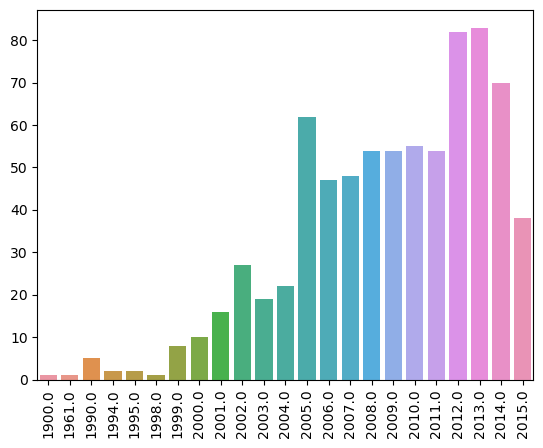

In [16]:
year_count = []
for val in df_store['CompetitionOpenSinceYear'].value_counts().index.sort_values().to_list():
    year_count.append(df_store['CompetitionOpenSinceYear'].value_counts()[val])

sns.barplot(x= df_store['CompetitionOpenSinceYear'].value_counts().index.sort_values().to_list(),y = year_count)
plt.xticks(rotation=90)
plt.show()

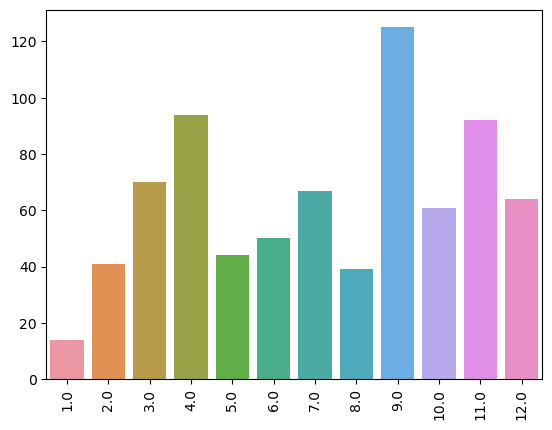

In [17]:
month_count = []
for val in df_store['CompetitionOpenSinceMonth'].value_counts().index.sort_values().to_list():
    month_count.append(df_store['CompetitionOpenSinceMonth'].value_counts()[val])

sns.barplot(x= df_store['CompetitionOpenSinceMonth'].value_counts().index.sort_values().to_list(),y = month_count)
plt.xticks(rotation=90)
plt.show()

In [18]:
df_store.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1115 entries, 0 to 1114
Data columns (total 10 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Store                      1115 non-null   int64  
 1   StoreType                  1115 non-null   object 
 2   Assortment                 1115 non-null   object 
 3   CompetitionDistance        1112 non-null   float64
 4   CompetitionOpenSinceMonth  761 non-null    float64
 5   CompetitionOpenSinceYear   761 non-null    float64
 6   Promo2                     1115 non-null   int64  
 7   Promo2SinceWeek            571 non-null    float64
 8   Promo2SinceYear            571 non-null    float64
 9   PromoInterval              571 non-null    object 
dtypes: float64(5), int64(2), object(3)
memory usage: 87.2+ KB


### Now we have filled all the missing values. So. let's visualize to get better insights.

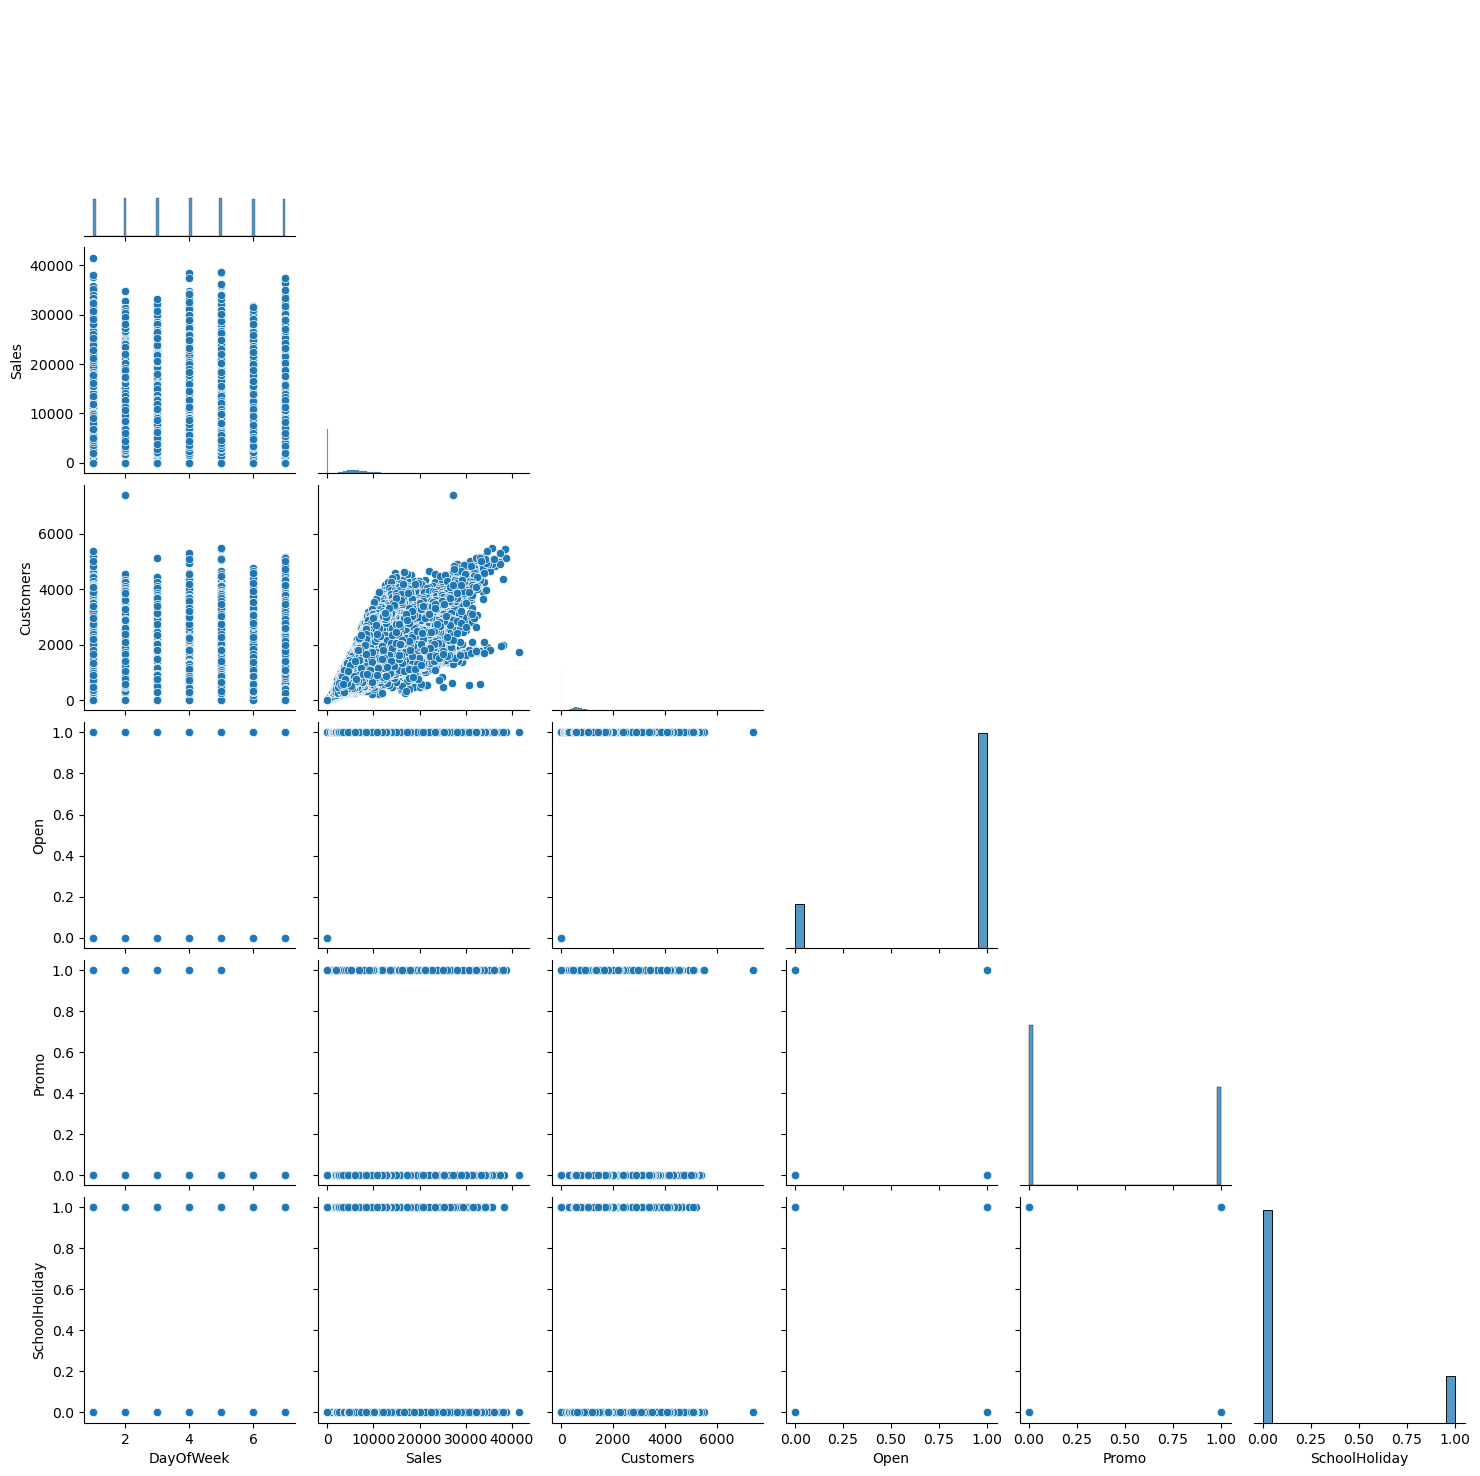

In [19]:
sns.pairplot(data=df_train[['DayOfWeek','Sales','Customers','Open','Promo','StateHoliday','SchoolHoliday']], corner = True)

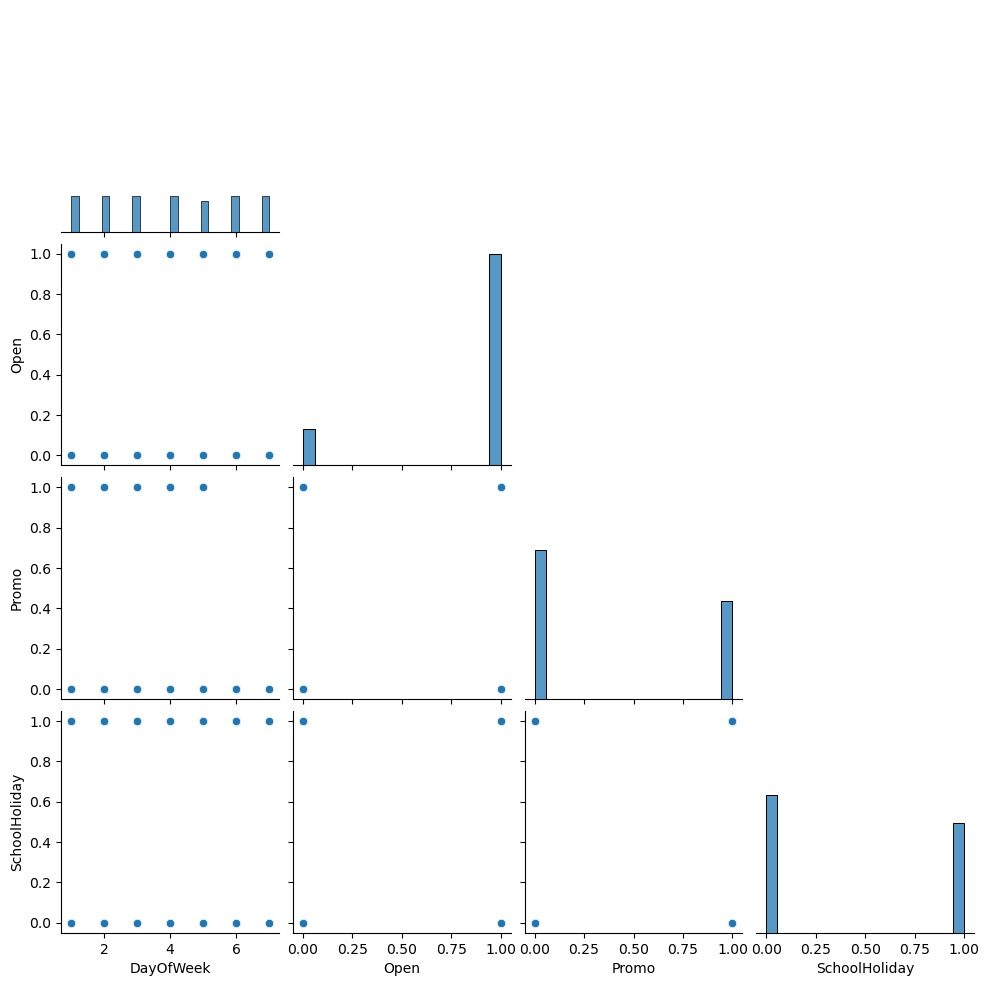

In [20]:
sns.pairplot(data=df_test[['DayOfWeek','Open','Promo','StateHoliday','SchoolHoliday']], corner = True)

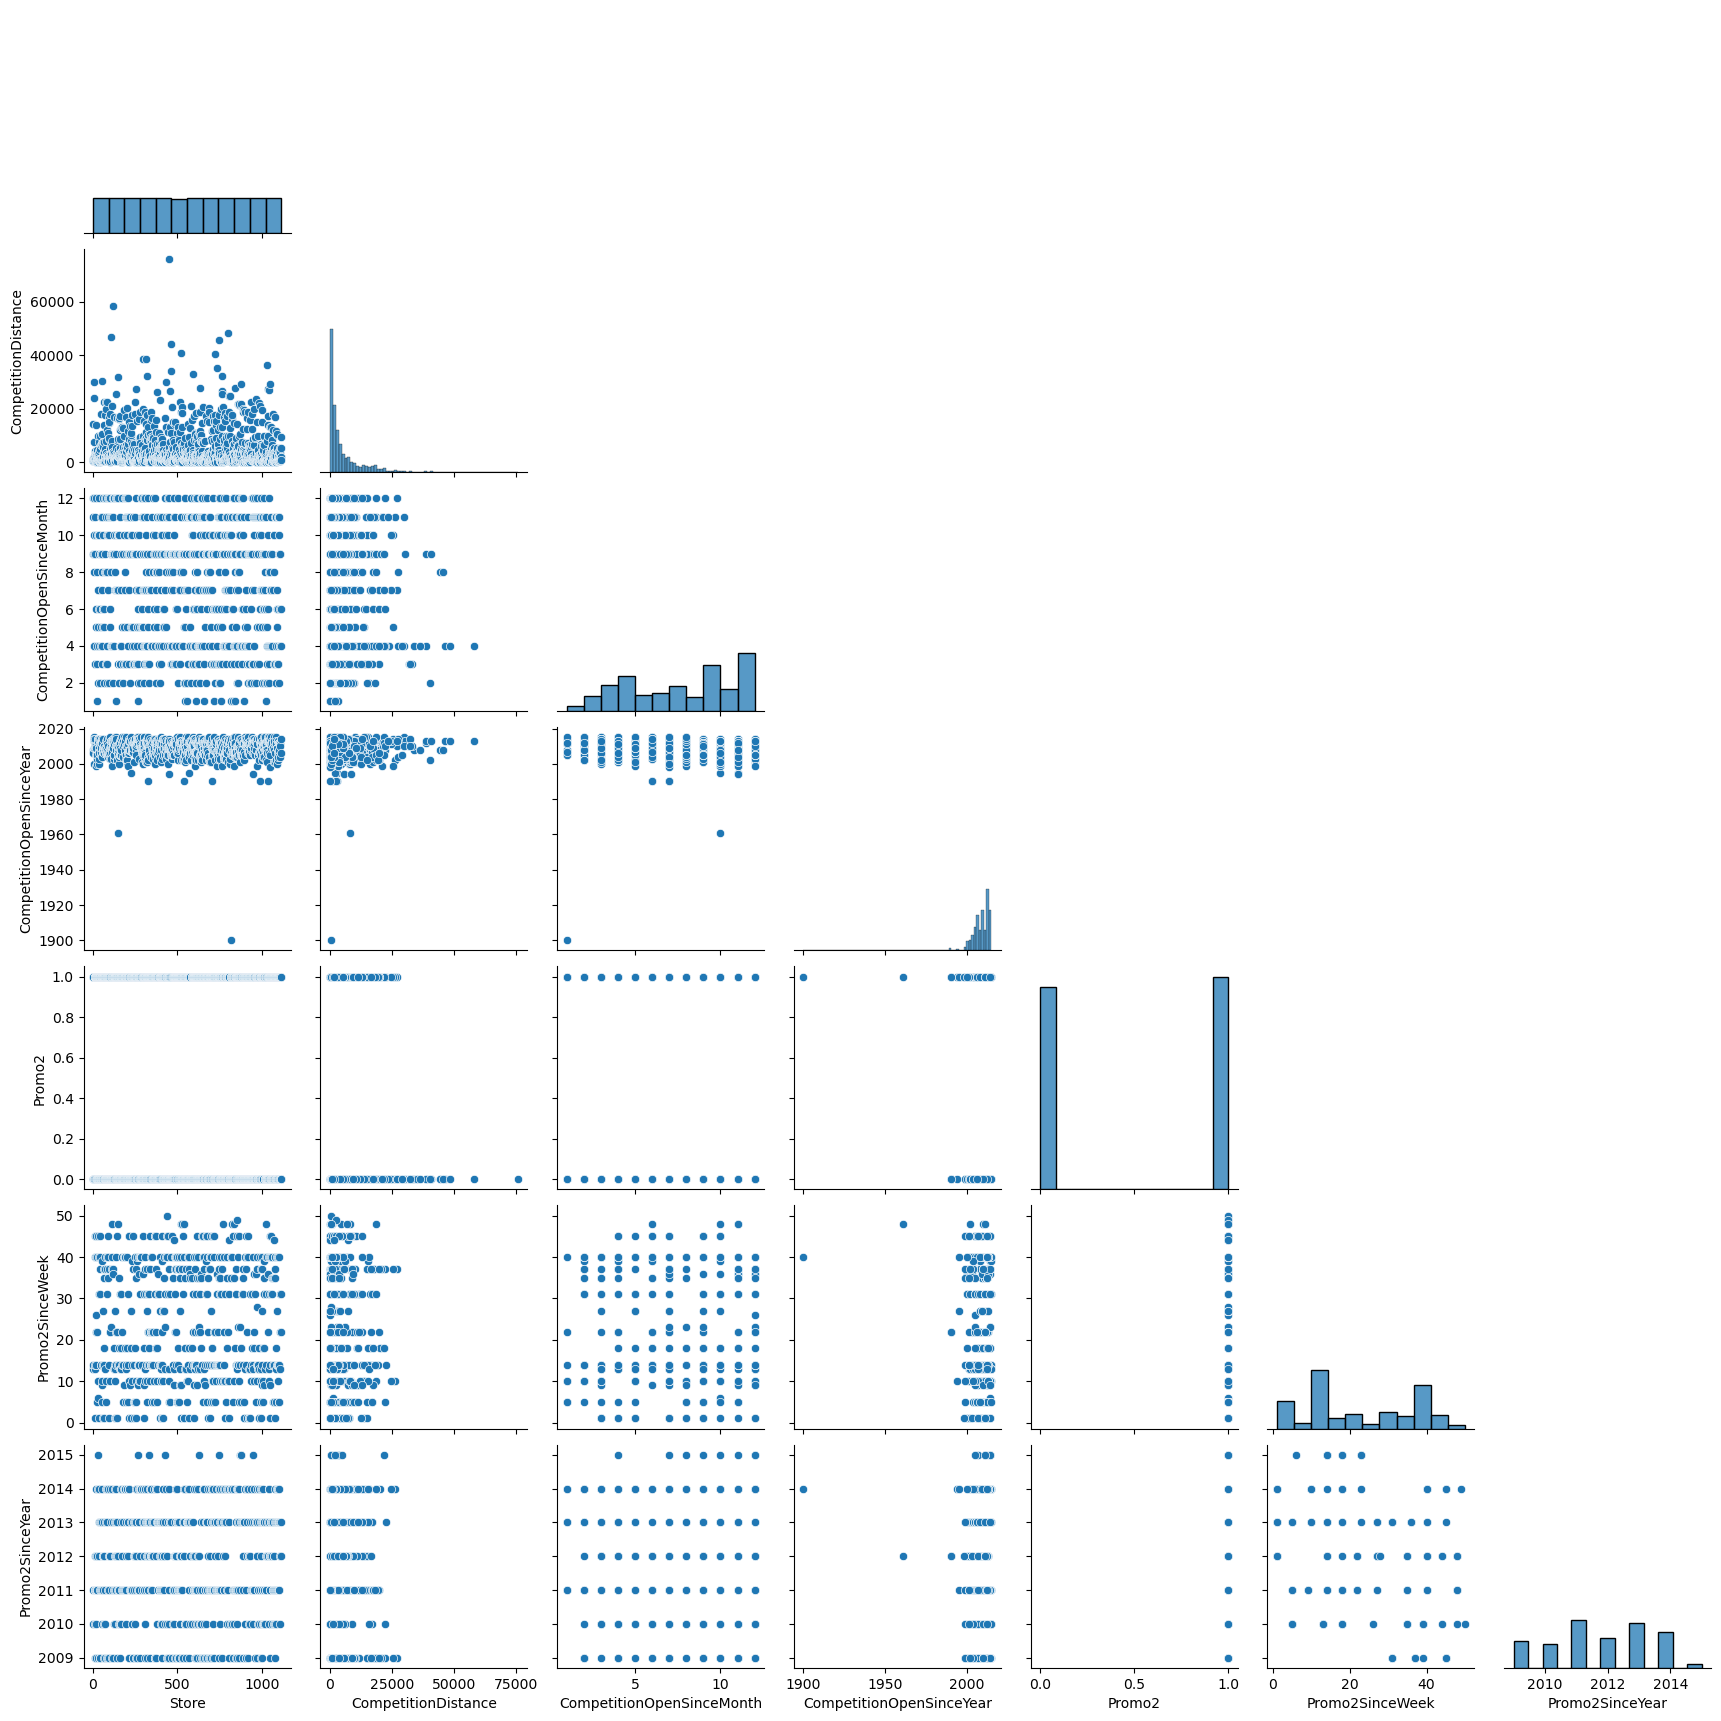

In [21]:
sns.pairplot(data=df_store, corner = True)

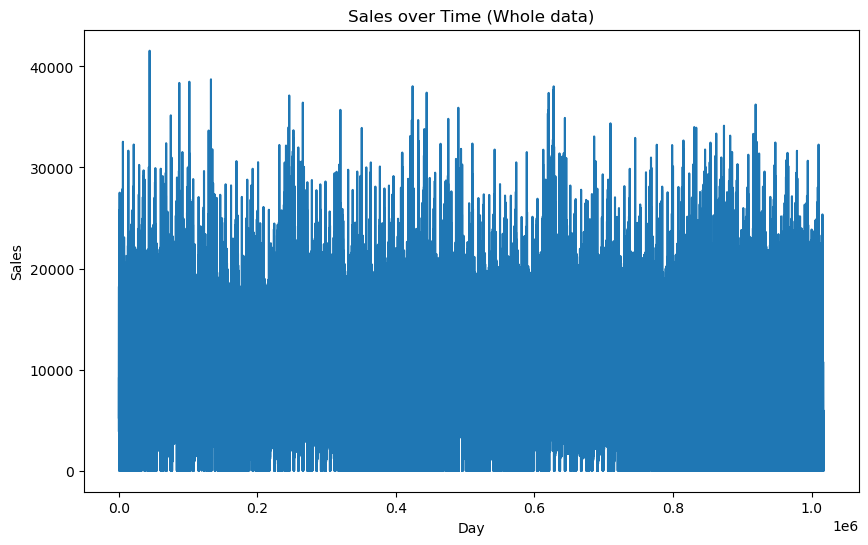

In [22]:
plt.figure(figsize=(10, 6))
df_train['Sales'].plot()
plt.xlabel('Day')
plt.ylabel('Sales')
plt.title('Sales over Time (Whole data)')
plt.show()

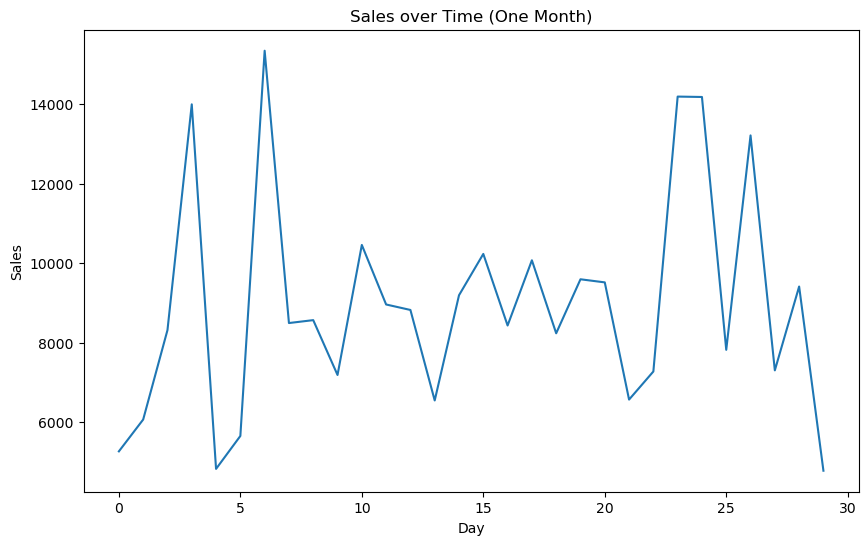

In [23]:
plt.figure(figsize=(10, 6))
df_train['Sales'][:30].plot()
plt.xlabel('Day')
plt.ylabel('Sales')
plt.title('Sales over Time (One Month)')
plt.show()

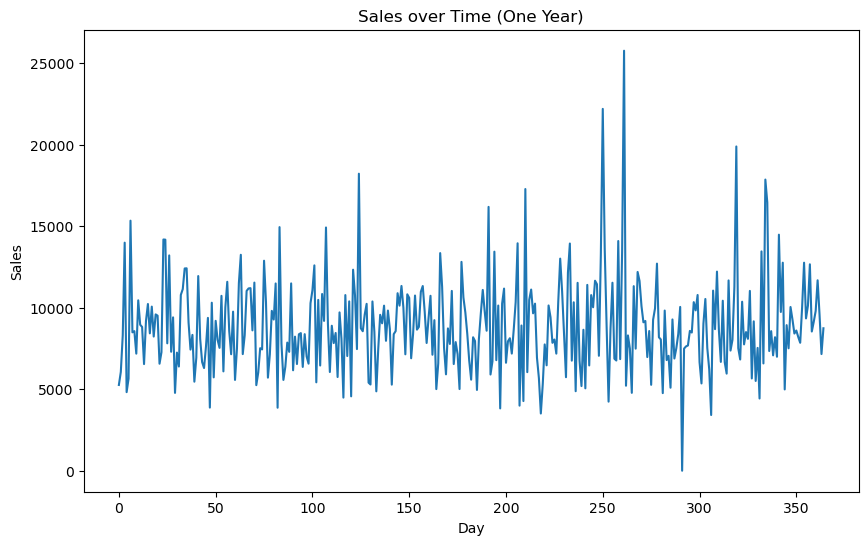

In [24]:
plt.figure(figsize=(10, 6))
df_train['Sales'][:365].plot()
plt.xlabel('Day')
plt.ylabel('Sales')
plt.title('Sales over Time (One Year)')
plt.show()

In [25]:
merged_df = df_train.merge(df_store, how='left', on='Store')
merged_test_df = df_test.merge(df_store, how='left', on='Store')

In [26]:
merged_df

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
0,1,5,2015-07-31,5263,555,1,1,0,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN
1,2,5,2015-07-31,6064,625,1,1,0,1,a,a,570.0,11.0,2007.0,1,13.0,2010.0,"Jan,Apr,Jul,Oct"
2,3,5,2015-07-31,8314,821,1,1,0,1,a,a,14130.0,12.0,2006.0,1,14.0,2011.0,"Jan,Apr,Jul,Oct"
3,4,5,2015-07-31,13995,1498,1,1,0,1,c,c,620.0,9.0,2009.0,0,NaN,NaN,NaN
4,5,5,2015-07-31,4822,559,1,1,0,1,a,a,29910.0,4.0,2015.0,0,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1017204,1111,2,2013-01-01,0,0,0,0,a,1,a,a,1900.0,6.0,2014.0,1,31.0,2013.0,"Jan,Apr,Jul,Oct"
1017205,1112,2,2013-01-01,0,0,0,0,a,1,c,c,1880.0,4.0,2006.0,0,NaN,NaN,NaN
1017206,1113,2,2013-01-01,0,0,0,0,a,1,a,c,9260.0,NaN,NaN,0,NaN,NaN,NaN
1017207,1114,2,2013-01-01,0,0,0,0,a,1,a,c,870.0,NaN,NaN,0,NaN,NaN,NaN


In [27]:
merged_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1017209 entries, 0 to 1017208
Data columns (total 18 columns):
 #   Column                     Non-Null Count    Dtype         
---  ------                     --------------    -----         
 0   Store                      1017209 non-null  int64         
 1   DayOfWeek                  1017209 non-null  int64         
 2   Date                       1017209 non-null  datetime64[ns]
 3   Sales                      1017209 non-null  int64         
 4   Customers                  1017209 non-null  int64         
 5   Open                       1017209 non-null  int64         
 6   Promo                      1017209 non-null  int64         
 7   StateHoliday               1017209 non-null  object        
 8   SchoolHoliday              1017209 non-null  int64         
 9   StoreType                  1017209 non-null  object        
 10  Assortment                 1017209 non-null  object        
 11  CompetitionDistance        1014567 no

<Axes: >

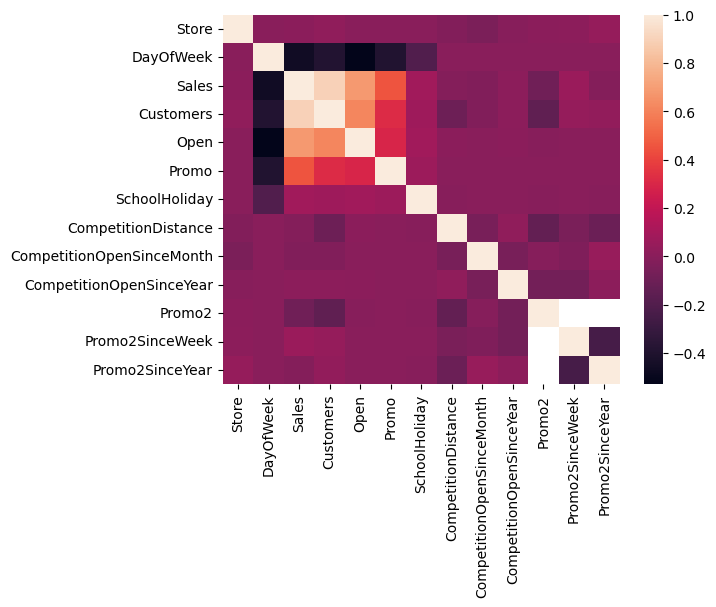

In [28]:
sns.heatmap(merged_df.corr(numeric_only=True))

Text(0.5, 0, 'Week Of Year')

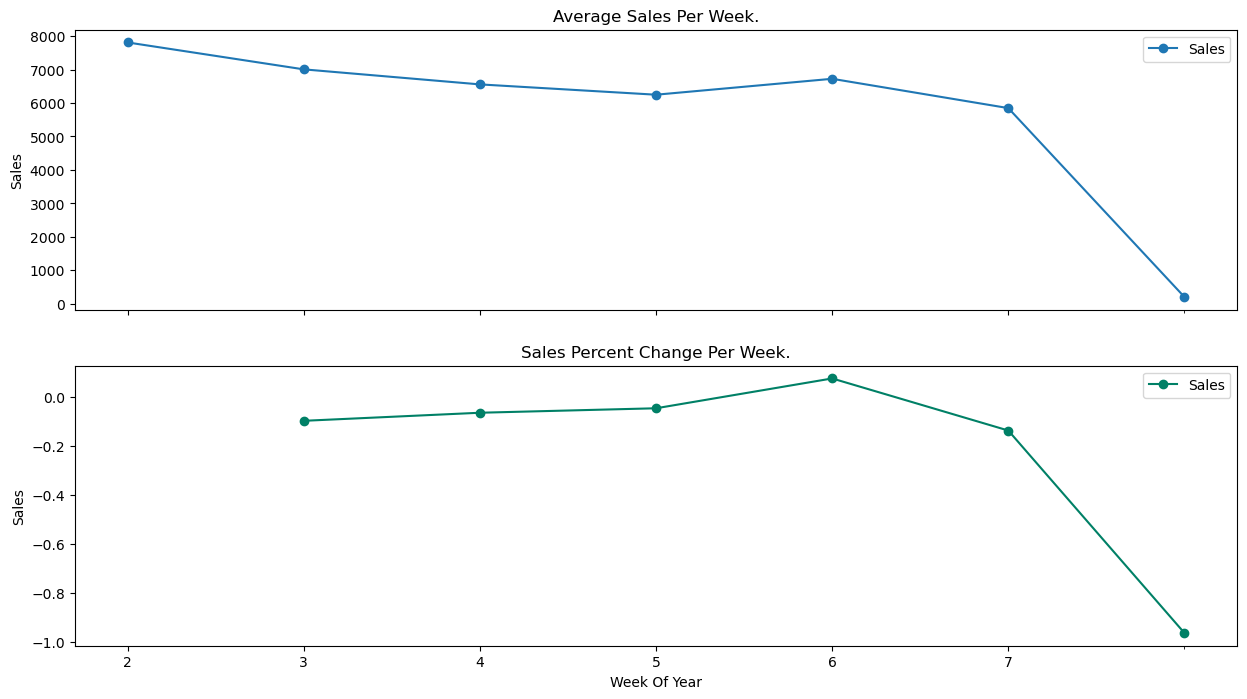

In [31]:
# group by date and get average sales, and precent change
average_sales    = merged_df.groupby('DayOfWeek')["Sales"].mean()
pct_change_sales = merged_df.groupby('DayOfWeek')["Sales"].sum().pct_change()

fig, (axis1,axis2) = plt.subplots(2,1,sharex=True,figsize=(15,8))

# plot average sales over time(year-month)
ax1 = average_sales.plot(legend=True, ax=axis1, marker='o', title="Average Sales Per Week.")
ax1.set_xticks(range(len(average_sales)))
ax1.set_xticklabels(average_sales.index.tolist())
ax1.set_ylabel('Sales', size=10)

# plot precent change for sales over time(year-month)
ax2 = pct_change_sales.plot(legend=True, ax=axis2, marker='o', colormap="summer", title="Sales Percent Change Per Week.")
plt.ylabel("Sales", size=10)
plt.xlabel('Week Of Year', size=10)

<Axes: ylabel='Frequency'>

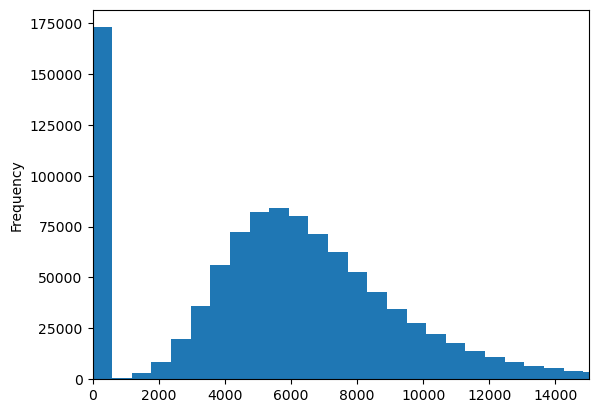

In [32]:
merged_df["Sales"].plot(kind='hist',bins=70,xlim=(0,15000))

<Axes: ylabel='Density'>

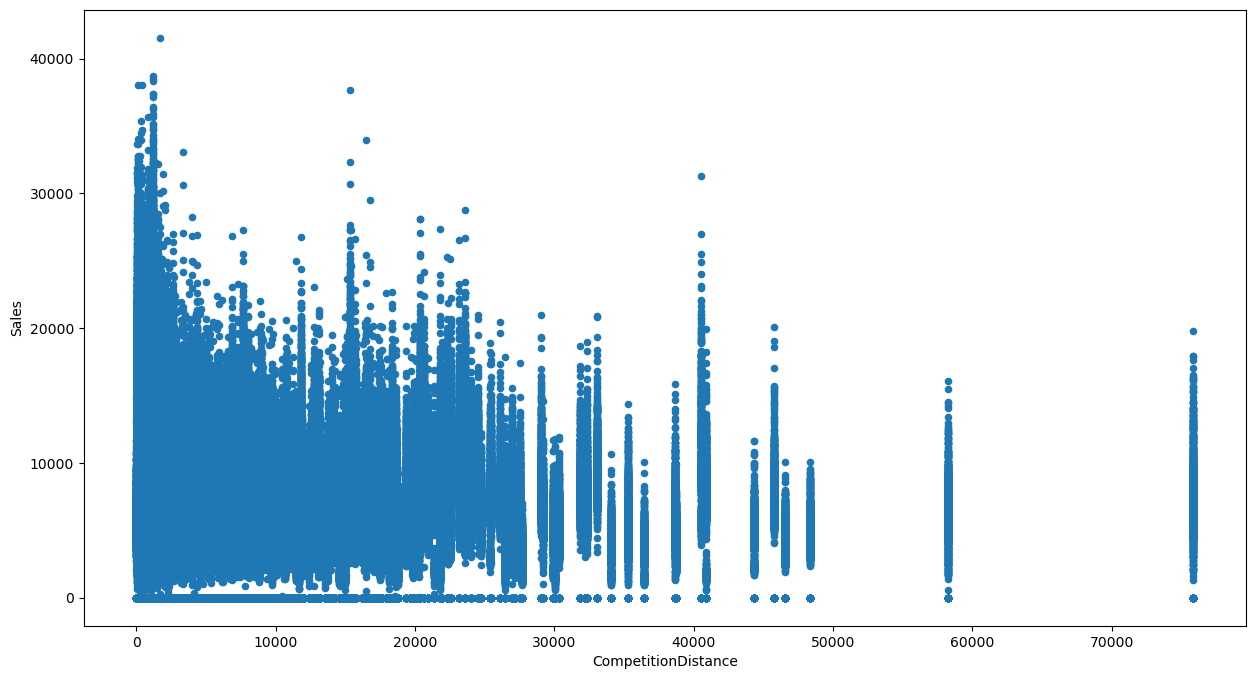

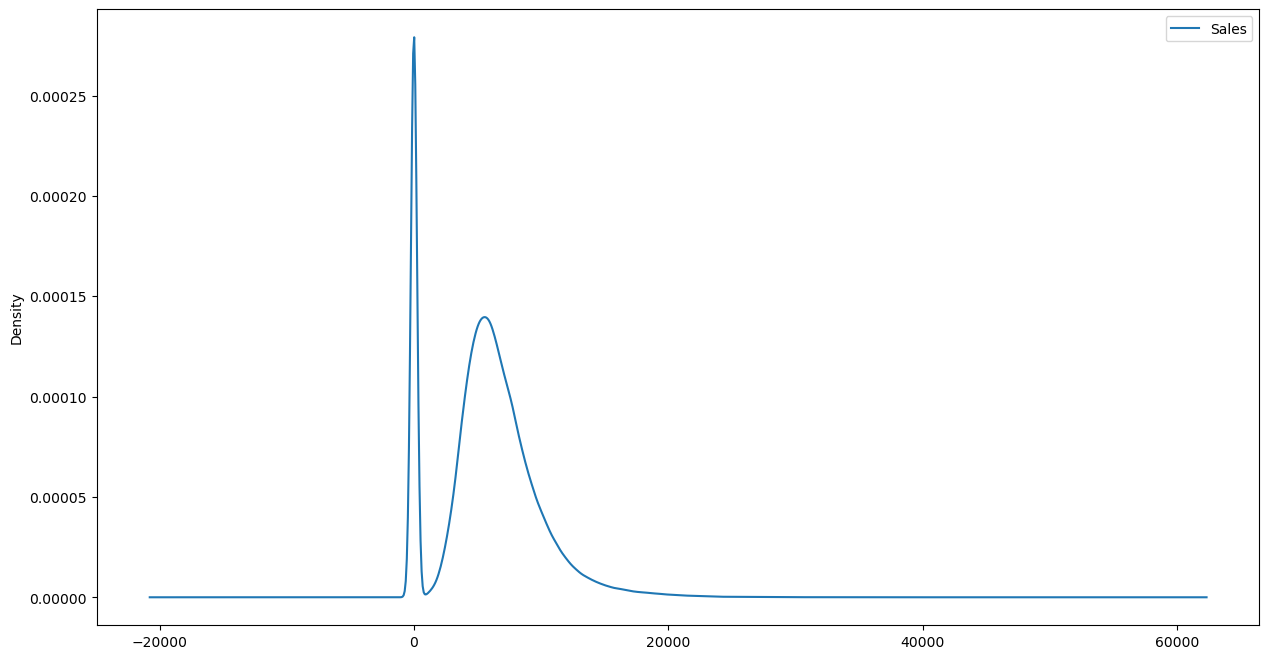

In [33]:
# CompetitionDistance

# fill NaN values
#df["CompetitionDistance"].fillna(df["CompetitionDistance"].median())

# Plot CompetitionDistance Vs Sales
merged_df.plot(kind='scatter',x='CompetitionDistance',y='Sales',figsize=(15,8))
merged_df.plot(kind='kde',x='CompetitionDistance',y='Sales',figsize=(15,8))

<Axes: xlabel='Customers', ylabel='Sales'>

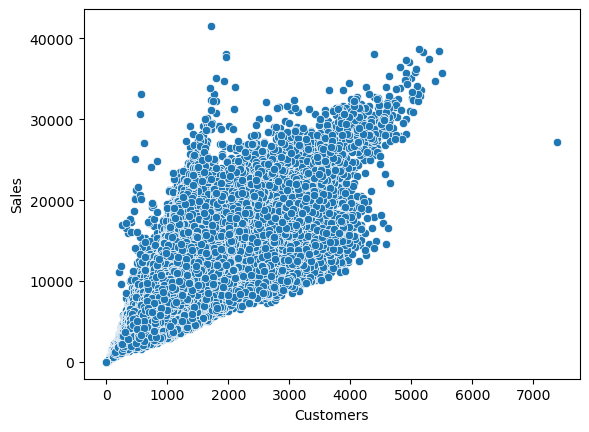

In [34]:
sns.scatterplot(data = merged_df, x = 'Customers', y = 'Sales')

In [40]:
#df.sort_values(by="Date", inplace=True)

In [41]:
#df = df.set_index('Date')

In [35]:
merged_df.sample(30)

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
195828,704,5,2015-02-06,12995,1256,1,1,0,1,d,c,1910.0,4.0,2009.0,0,NaN,NaN,NaN
602548,119,2,2014-01-07,8022,841,1,1,0,0,a,c,2100.0,2.0,2010.0,0,NaN,NaN,NaN
1014514,650,4,2013-01-03,4944,570,1,0,0,1,a,a,1420.0,10.0,2012.0,1,40.0,2014.0,"Jan,Apr,Jul,Oct"
694758,899,4,2013-10-17,4340,509,1,0,0,0,d,a,2590.0,NaN,NaN,1,13.0,2010.0,"Jan,Apr,Jul,Oct"
511367,368,7,2014-03-30,0,0,0,0,0,0,d,c,1450.0,4.0,2005.0,1,45.0,2009.0,"Feb,May,Aug,Nov"
662044,520,5,2013-11-15,3458,426,1,0,0,0,a,c,6900.0,NaN,NaN,1,40.0,2012.0,"Mar,Jun,Sept,Dec"
673467,793,2,2013-11-05,6900,535,1,1,0,0,d,a,2710.0,7.0,2006.0,0,NaN,NaN,NaN
475997,678,4,2014-05-01,0,0,0,1,a,0,c,a,3250.0,NaN,NaN,1,40.0,2011.0,"Jan,Apr,Jul,Oct"
609487,368,3,2014-01-01,0,0,0,0,a,1,d,c,1450.0,4.0,2005.0,1,45.0,2009.0,"Feb,May,Aug,Nov"
53453,1049,7,2015-06-14,0,0,0,0,0,0,a,a,370.0,7.0,2012.0,1,14.0,2011.0,"Jan,Apr,Jul,Oct"


<Axes: title={'center': 'Store vs.Open'}, xlabel='Open', ylabel='Store'>

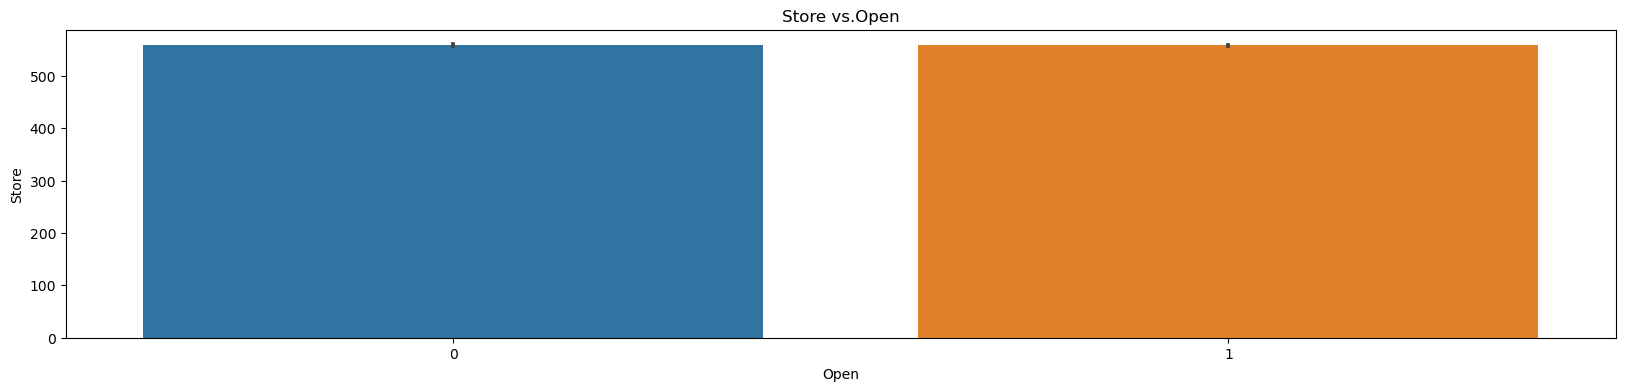

In [41]:
fig, axis1 = plt.subplots(1,1,figsize=(20,4))

axis1.title.set_text('Store vs.Open')
#axis2.title.set_text('Store vs.Customers')
sns.barplot(x='Open', y='Store', data=merged_df, ax=axis1)
#sns.barplot(x='Store', y='Customers',data=df_train, ax=axis2)

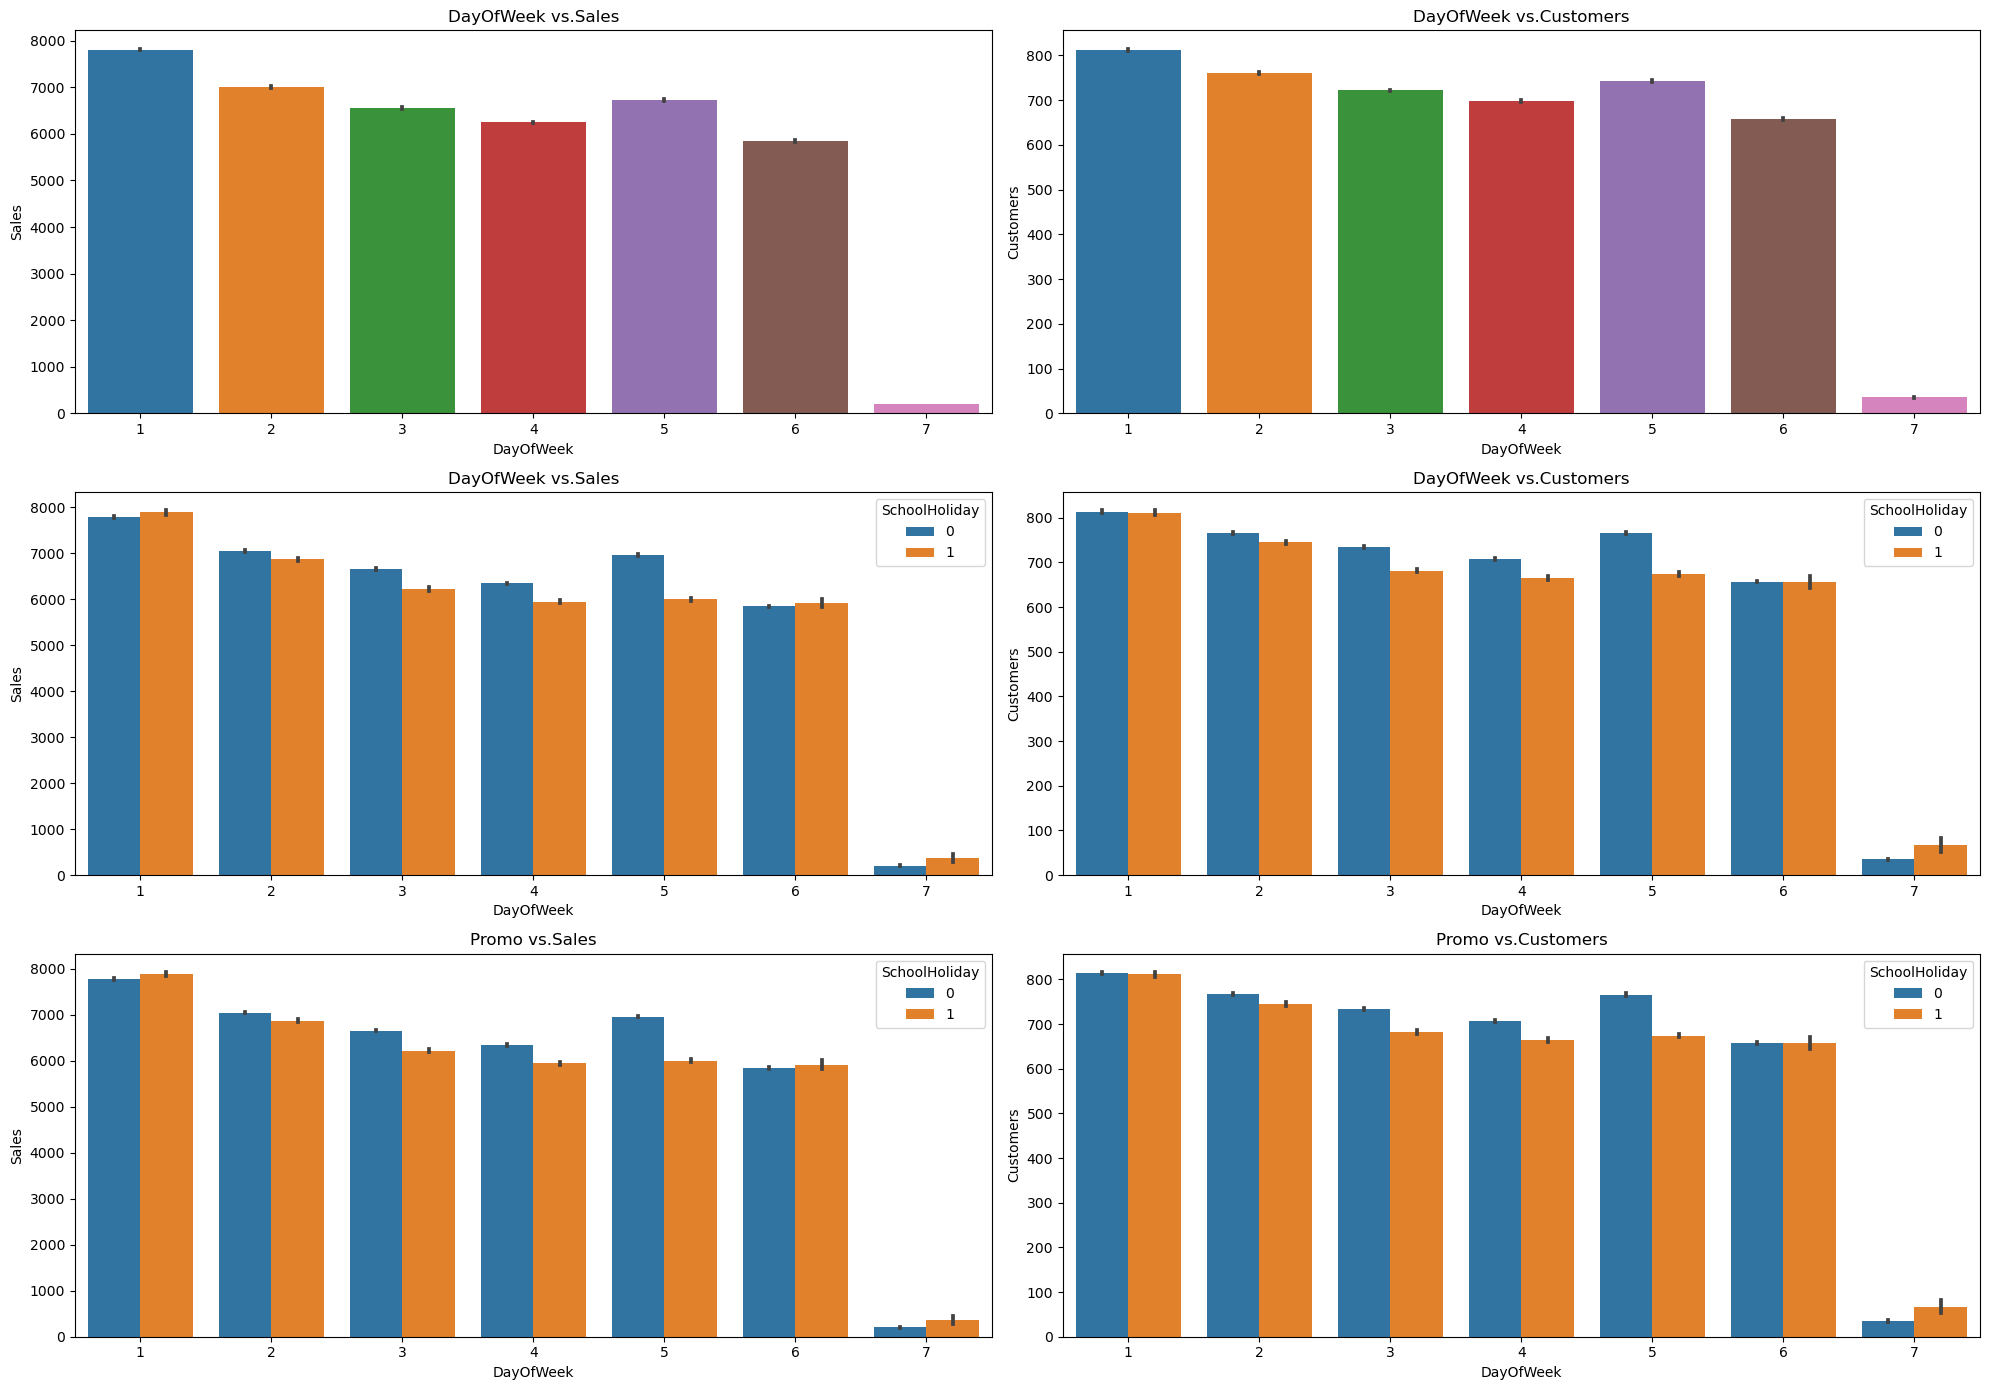

In [42]:
fig, axes = plt.subplots(3,2,figsize=(20,14))
axes[0,0].title.set_text('DayOfWeek vs.Sales')
axes[0,1].title.set_text('DayOfWeek vs.Customers')
axes[1,0].title.set_text('DayOfWeek vs.Sales')
axes[1,1].title.set_text('DayOfWeek vs.Customers')
axes[2,0].title.set_text('Promo vs.Sales')
axes[2,1].title.set_text('Promo vs.Customers')
sns.barplot(x='DayOfWeek', y='Sales', data=merged_df, ax=axes[0,0])
sns.barplot(x='DayOfWeek', y='Customers',data=merged_df, ax=axes[0,1])
sns.barplot(x='DayOfWeek', y='Sales', hue = 'SchoolHoliday', data=merged_df, ax=axes[1,0])
sns.barplot(x='DayOfWeek', y='Customers', hue = 'SchoolHoliday',data=merged_df, ax=axes[1,1])
sns.barplot(x='DayOfWeek', y='Sales', hue = 'SchoolHoliday', data=merged_df, ax=axes[2,0])
sns.barplot(x='DayOfWeek', y='Customers', hue = 'SchoolHoliday',data=merged_df, ax=axes[2,1])
plt.tight_layout()

**Obseravtions:**

Here we observe that both Sales and Customers increases by a significant amount during Promotions. This shows that Promotion has a positive effect for a store.

<Axes: xlabel='Store', ylabel='Count'>

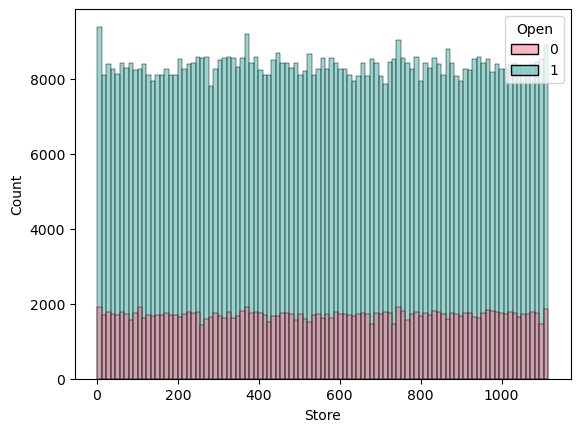

In [44]:
sns.histplot(x='Store',hue='Open', data=merged_df ,palette="husl")

<Axes: xlabel='StateHoliday', ylabel='count'>

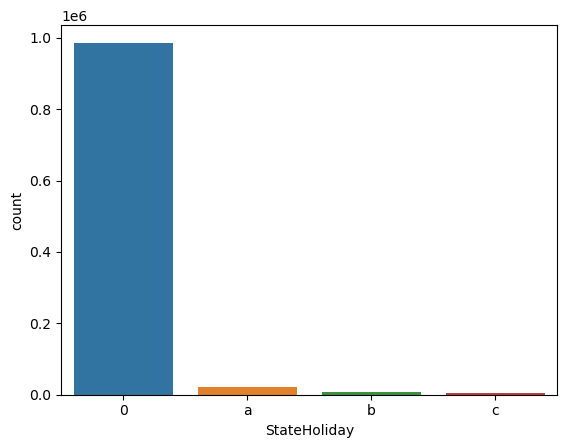

In [55]:
sns.countplot(x='StateHoliday', data=merged_df)

<Axes: xlabel='SchoolHoliday', ylabel='count'>

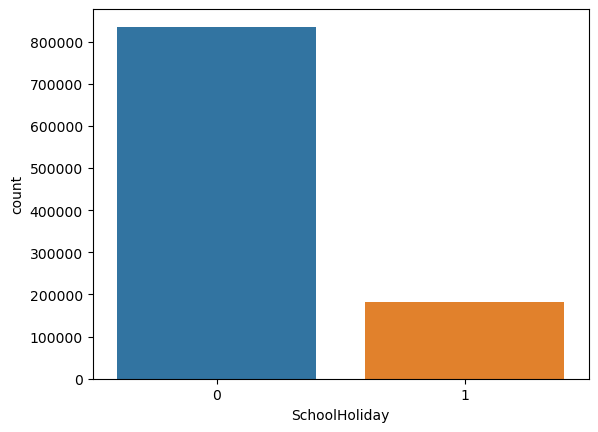

In [46]:
sns.countplot(x='SchoolHoliday', data=merged_df)

<Axes: xlabel='Sales', ylabel='Density'>

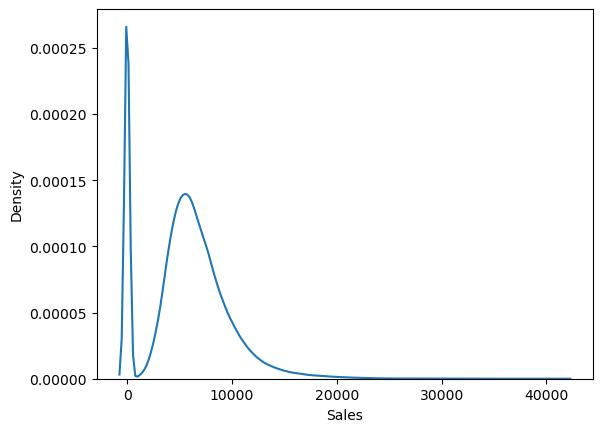

In [47]:
sns.kdeplot(merged_df['Sales'])

<Axes: xlabel='Customers', ylabel='Density'>

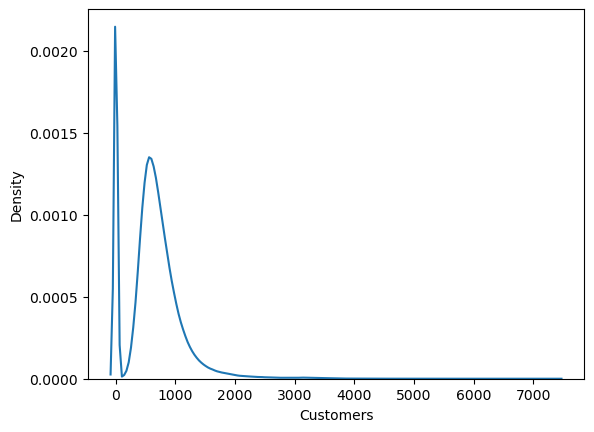

In [48]:
sns.kdeplot(merged_df['Customers'])

<Axes: xlabel='Store', ylabel='Count'>

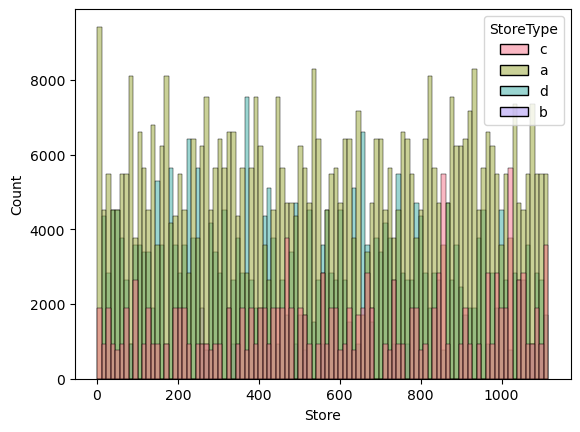

In [49]:
sns.histplot(x='Store',hue='StoreType', data=merged_df,palette="husl")

<Axes: xlabel='Store', ylabel='Count'>

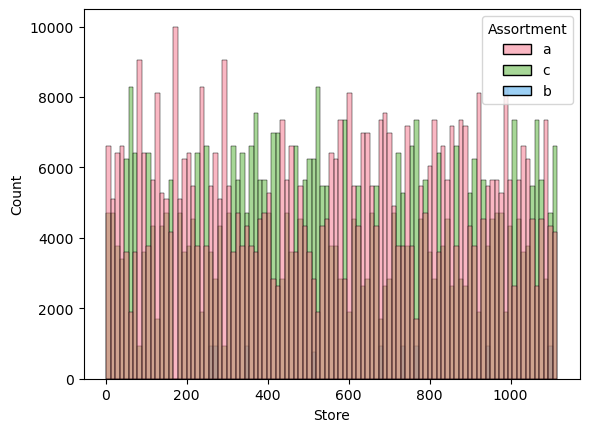

In [50]:
sns.histplot(x='Store',hue='Assortment', data=merged_df,palette="husl")

<Axes: xlabel='Assortment', ylabel='Count'>

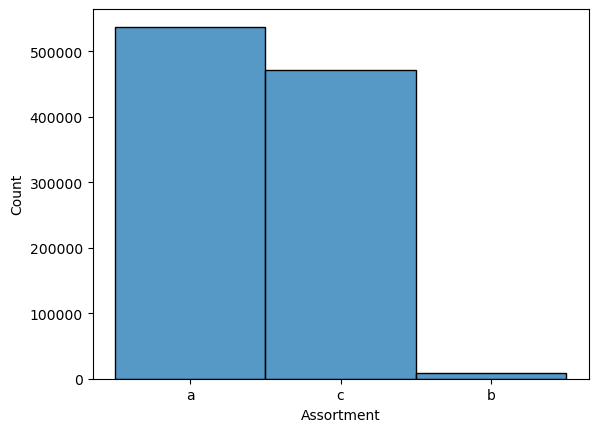

In [51]:
sns.histplot(x='Assortment', data=merged_df,palette="husl")

<Axes: xlabel='Open', ylabel='count'>

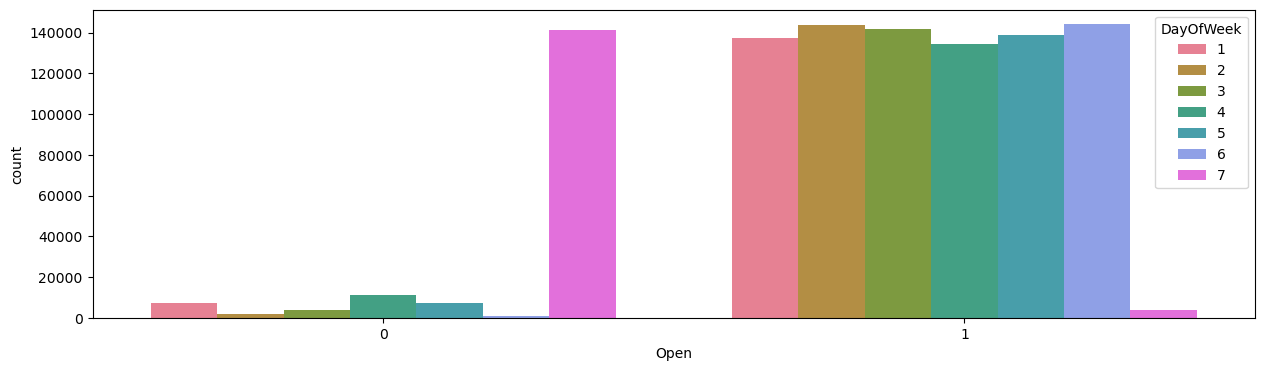

In [52]:
fig, (axis1) = plt.subplots(1,1,figsize=(15,4))
sns.countplot(x='Open',hue='DayOfWeek', data=merged_df,palette="husl", ax=axis1) 